# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left(Y_n-Y_{n+h}\right)^2 = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


1)
$\mathbb{E}\left(X_{i}\right) = \frac{1}{2} \cdot1+\frac{1}{2}\cdot(-1)=0$

$\mathbb{V}\left(X_{i}\right)=\mathbb{E}\left(\left(X_{i}-\mathbb{E}\left(X_{i}\right)\right)^{2}\right) =\mathbb{E}\left(X_{i}^{2}\right)=\frac{1}{2} \cdot 1+\frac{1}{2}\cdot1 = 1$

2)
$\mathbb{E}\left(Y_{n}\right) =\sum_{i=1}^{n} \mathbb{E}\left(X_{i}\right)=0$

$\mathbb{V}\left(Y_{n}\right) =\sum_{i=1}^{n} \mathbb{V}\left(X_{i}\right)=n$

3)
Si $n \in \mathbb{N}$, $Y_{n}=\sum_{i=1}^{n} X_{i}=Y_{n-1}+X_{n}$

$Y_{|Y_{n-1}}$ ne dépend que de $X_n$ et est donc indépendant des $X_1, \ldots, X_{n-1}$ par indépendance des $X_{i}$

Par le lemme des coalitions, $Y_{|Y_{n-1}}$ indépendant des $Y_1, \ldots, Y_{n-2}$, et donc

$$\mathbb{P}_{Y_{n}|Y_{n-1}=y_{n-1}, \cdots, Y_{0}=y_{0}}=\mathbb{P}_{Y_{n}|Y_{n-1}=y_{n-1}}$$

4)
Soient  $n, n^{\prime}\in \mathbb{N} \quad n<n^{\prime}$

$\operatorname{Cov}\left(Y_{n}, Y_{n^{\prime}}\right)=\mathbb{E}\left(\left(Y_{n}-\mathbb{E}\left(Y_{n}\right)\right)\left(Y_{n^{\prime}}-\mathbb{E}\left(Y_{n^{\prime}}\right)\right)\right)$

$=\mathbb{E}\left(Y_{n} Y_{n^{\prime}}\right)=\mathbb{E}\left(Y_{n} \sum_{i=1}^{n^{\prime}} X_{i}\right)=\mathbb{E}\left(Y_{n}\left(Y_{n}+\sum_{i=n+1}^{n^{\prime}} X_{i}\right)\right)$

$=\mathbb{E}\left(Y_{n}{ }^{2}\right)+\mathbb{E}\left(Y_{n} \sum_{i=n+1}^{n^{\prime}} X_{i}\right)$

$=\mathbb{V}\left(Y_{n}\right)+\mathbb{E}\left(Y_{n}\right) \mathbb{E}\left(\sum_{i=n+1}^{n^{\prime}}X_{i}\right)$ car $Y_n$ indépendent des $(X_i)_{i>n+1}$ (par indépendance des $(X_i)$)

$=n+0=n$

Par symétrie de $n$ et $n^{\prime}$, 
$$\operatorname{Cov}\left(Y_{n}, Y_{n}^{\prime}\right)=\min \left(n, n^{\prime}\right)$$

On en déduit donc que

$\mathbb{E}\left(\left(Y_{n}-Y_{n+h}\right)^{2}\right)=\mathbb{E}\left(Y_{n}^{2}+Y_{n+h}^{2}-2 Y_{n} Y_{n+h}\right)$

$=\mathbb{E}\left(Y_{n}^{2}\right)+\mathbb{E}\left(Y_{n+h}^{2}\right)-2 \mathbb{E}\left(Y_{n} Y_{n+h}\right)$

$=\mathbb{V}\left(Y_{n}\right)+\mathbb{V}\left(Y_{n+h}\right)-2 \operatorname{Cov}\left(Y_{n}, Y_{n+h}\right)$

$=n+n+h-2n=h$

Donc
$$\frac{1}{2} \mathbb{E}\left(\left(Y_{n}-Y_{n+h}\right)^{2}\right)=h/2$$

5)
On applique le théorème central limite (TCL) :

Les $X_i$ sont bien indépendants et identiquement distribués, leur espérance vaut $\mu=0$ et leur variance $\sigma^2=1$.

Ainsi, $\frac{Y_n-n\mu}{\sigma\sqrt{n}}\xrightarrow[n\to+\infty]{\mathcal{L}}\mathcal{N}(0,1)$

Et donc,
$$\frac{Y_n}{\sqrt{n}}\xrightarrow[n\to+\infty]{\mathcal{L}}\mathcal{N}(0,1)$$

In [2]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



In [4]:
def alea():
    #renvoie 1 ou -1 aléatoirement avec la même probabilité
    x=np.random.random()
    if x<0.5:
        return -1
    else :
        return 1

def print_Z(n):
    # trace la liste des Z_ti(n) avec i entre 0 et n
    L=[]
    Y=0
    for i in range(n+1):
        X=alea()
        Y+=X
        L.append(Y/n**0.5)
    X=list(range(n+1))
    plt.plot(X,L)
    plt.show()

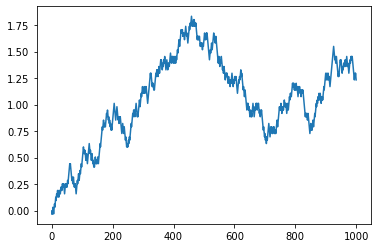

In [5]:
print_Z(1000)

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



In [6]:
def Z1(n):
    # renvoie une valeur de Z_1(n)
    Y=0
    for i in range(1,n+1):
        X=alea()
        Y+=X
    return Y/(n**0.5)

def print_Z1(n,nb):
    ## nb est la taille de l'échantillon
    plt.hist([Z1(n) for i in range(nb)],50,density=True, label = "Data")
    X=np.linspace(-4,4,n)
    plt.plot(X,sps.norm.pdf(X),"r",label="Theory")
    plt.legend(loc="best")
    plt.show()

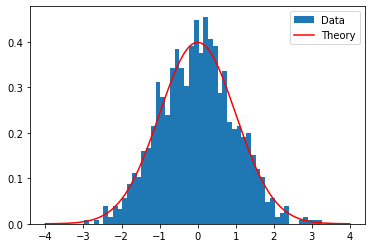

In [7]:
n,nb=10000,1000
print_Z1(n,nb)

**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

In [8]:
def list_Z_bis(n):
    # renvoie la liste des Z_ti_bis(n) avec i entre 0 et n
    L=np.zeros(n) #sera la liste des Z_ti(n)
    U=np.random.random(size=n)
    for j in range(n): #on somme pour j allant de 1 à n
        u=U[j] #à voir
        X=alea()
        for i in range(n):
            if i/n<u:
                L[i]+=X
            else :
                L[i]-=X
    return L/np.sqrt(n)

def print_Z_bis(n):
    X=list(range(n))
    plt.plot(X,list_Z_bis(n))
    plt.show()

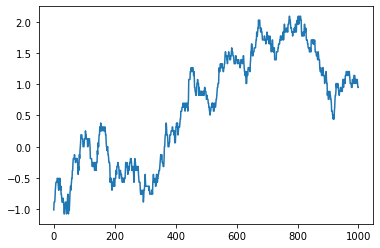

In [9]:
print_Z_bis(1000)

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

In [10]:
def Z_bis(t,n):
    # renvoie une valeur de Z_bis_t(n)
    Y=0
    for i in range(n): #on somme pour i allant de 1 à n
        u=np.random.random()
        X=alea()
        if t<u:
            Y+=X
        else :
            Y-=X
    return Y/(n**0.5)

def print_Z1_bis(n,nb,points):
    ## nb est la taille de l'échantillon
    # points est la liste des points où on veut vérifier la loi normale
    for t in points:
        plt.hist([Z_bis(t,n) for i in range(nb)],50,density=True, label = "Data")
        X=np.linspace(-4,4,n)
        plt.plot(X,sps.norm.pdf(X),"r",label="Theory")
        plt.legend(loc="best")
        plt.title(f"Au point {t=}")
        plt.show()

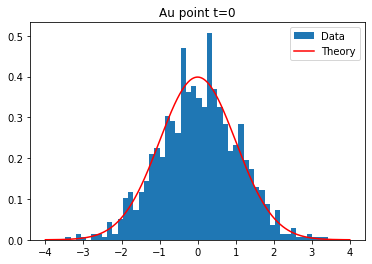

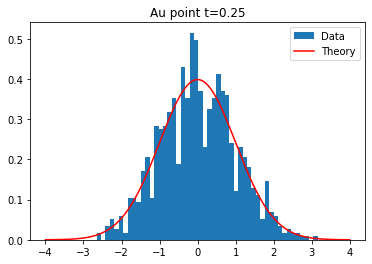

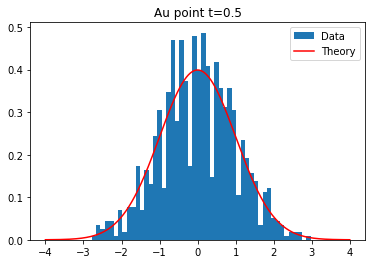

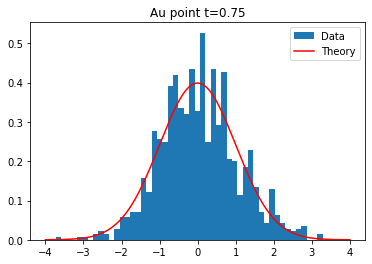

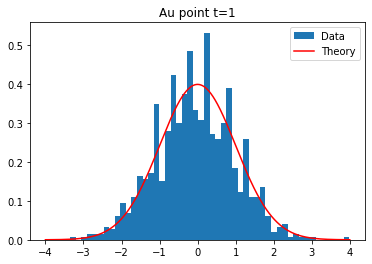

In [11]:
points = [0,0.25,0.5,0.75,1]
n,nb=1000,1000
print_Z1_bis(n,nb,points)

3. Montrer que $\frac12\mathbb{E}\left(\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h}\right)^2 = h$ pour $h>0$ et tel que $t+h \leq 1$.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

In [13]:
np.random.seed(1234)

def print_q4(n,kmax):
    L=list_Z_bis(n) # la liste des Z_bis(ti,n) pour tous les ti
    H=[]
    Y=[]
    for k in range(1,kmax+1):
        h=k/n
        H.append(h)
        S=0
        for i in range(n-k):
            j=i+k  #ti=i/n, tj=ti+h=(i+k)/n
            S+=(L[i]-L[j])**2
        Y.append(S/(2*(n-k)))
    plt.plot(H,Y)
    plt.plot(H,2*np.array(H),c="r")
    plt.show()

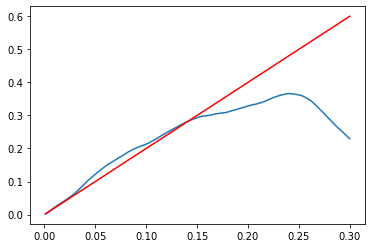

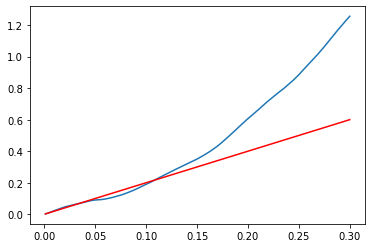

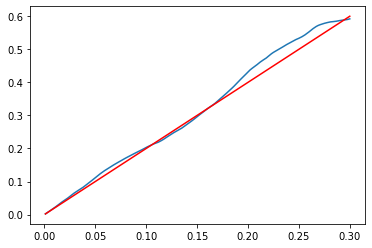

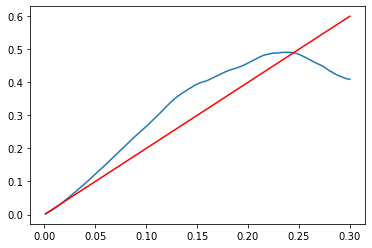

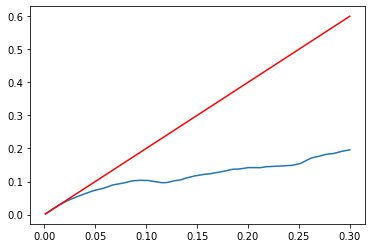

In [14]:
n=1000
kmax=300
print_q4(n,kmax)
print_q4(n,kmax)
print_q4(n,kmax)
print_q4(n,kmax)
print_q4(n,kmax)

5. Décrire les différences et les similarités entre les deux approches.

La deuxième approche rajoute un critère aléatoire avec la loi uniforme sur ]0,1[, qui augmente la variogramme de Z et donc son irrégularité. La variable Z converge toujours en loi vers $\mathcal{N}(0,1)$ mais elle est moins régulière.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

In [15]:
import math
def droite_aléatoire(n):
    A=np.random.uniform(0,math.pi,n)
    P=np.random.uniform(-2**0.5,2**0.5,n)
    X=np.linspace(-1,1,100)
    for i in range(n):
        Y=[(P[i]-x*math.cos(A[i]))/math.sin(A[i]) for x in X]
        plt.plot(X,Y)
    plt.ylim(-1.1,1.1)
    plt.legend([f"{i+1}" for i in range(n)], loc="best")
    plt.show()

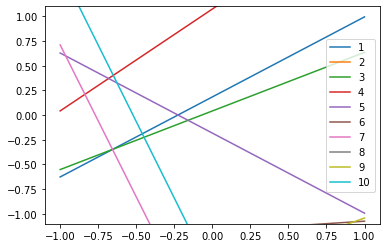

In [16]:
n=10
droite_aléatoire(n)

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

In [17]:
def separate_domain(resolution):
    a=np.random.uniform(0,math.pi)
    p=np.random.uniform(-2**0.5,2**0.5)
    X=np.linspace(-1,1,resolution)
    Y=np.linspace(-1,1,resolution)
    grx,gry=np.meshgrid(X,Y)
    Z=(grx*math.cos(a)+gry*math.sin(a) - p)/np.abs(grx*math.cos(a)+gry*math.sin(a) - p)
    plt.plot(X,[(p-x*math.cos(a))/math.sin(a) for x in X],color = "r")
    plt.ylim(-1,1)
    c=plt.pcolormesh(grx,gry,Z,vmin=-1, vmax=1)
    plt.colorbar(c)
    print(a,p)
    plt.show()

0.14853874020977745 0.3617974631512135


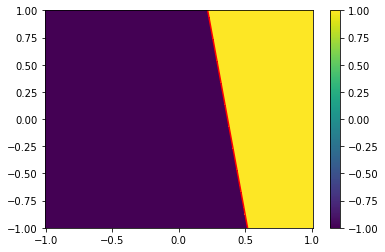

In [18]:
resolution=200
separate_domain(resolution)

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

Chaque droite sépare le domaine en deux en associant +1 ou -1 à chaque point. En itérant ce procédé, la marche aléatoire sera définie sur $[-1,1]^2$

In [19]:
def marche_aleatoire(resolution,n):
    A=np.random.uniform(0,math.pi,n)
    P=np.random.uniform(-2**0.5,2**0.5,n)
    X=np.linspace(-1,1,resolution)
    Y=np.linspace(-1,1,resolution)
    grx,gry=np.meshgrid(X,Y)
    S=np.zeros((resolution,resolution))
    for k in range(n):
        Z=grx*math.cos(A[k])+gry*math.sin(A[k]) - P[k]
        x=alea() #on choisit aléatoirement quelle partie recevra la valeur -1 et l'autre 1
        for i in range(resolution):
            for j in range(resolution):
                if Z[i][j]>0:
                    S[i][j]+=x
                else:
                    S[i][j]-=x
    return grx,gry,S/n**0.5
    
def print_marche_aleatoire(grx,gry,Z):
    c=plt.pcolormesh(grx,gry,Z)
    plt.colorbar(c)
    plt.show()

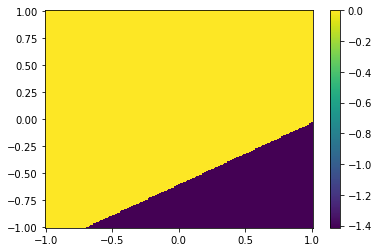

In [20]:
resolution=200
n=2
print_marche_aleatoire(*marche_aleatoire(resolution,n))

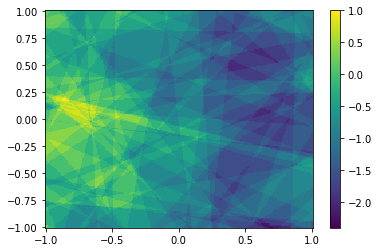

In [21]:
resolution=200
n=100
print_marche_aleatoire(*marche_aleatoire(resolution,n))

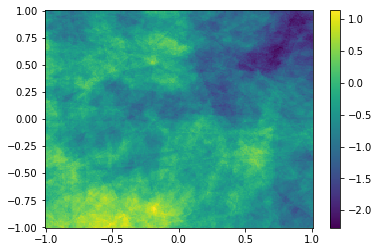

In [22]:
resolution=200
n=1000
print_marche_aleatoire(*marche_aleatoire(resolution,n))

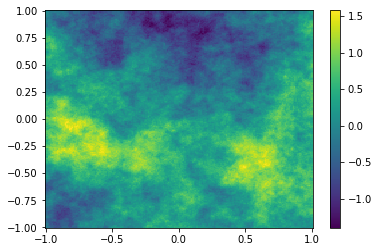

In [23]:
resolution=200
n=10000
print_marche_aleatoire(*marche_aleatoire(resolution,n))

On obtient des valeurs aléatoires sur l'ensemble du graphe. On remarque que la plupart des points ont une valeur moyenne (en bleu), et que peu de points ont des valeurs extrêmes (en jaune et violet). Cela est cohérent avec une marche aléatoire.

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

In [24]:
def print_q4_bis(resolution,n,kmax):
    grx,gry,Z=marche_aleatoire(resolution,n)
    H=[]
    Y=[]
    for k in range(kmax+1):
        h=k/resolution
        H.append(h)
        S=0
        N=0
        #on commence par sommet sur les axes horizontaux
        for ligne in range(resolution): # on fixe la ligne
            for i in range(resolution-k): #on somme sur les axes verticaux et horizontaux
                j=i+k #ti=(xi,i/n), tj=ti+h=(xi,(i+k)/n)
                S+=(Z[ligne,i]-Z[ligne,j])**2
                N+=1
        #on somme aussi sur les axes verticaux
        for colonne in range(resolution): #on fixe la colonne
            for i in range(resolution-k):
                j=i+k
                S+=(Z[i,colonne]-Z[k,colonne])**2
                N+=1
        Y.append(S/2*N)
    plt.plot(H,Y)
    plt.show()

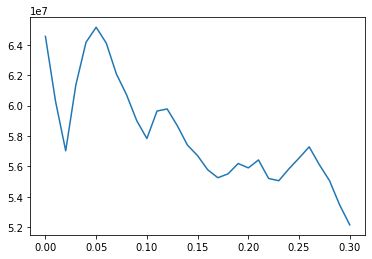

In [25]:
resolution=100
n=1000
kmax=30
print_q4_bis(resolution,n,kmax)

Soit j'ai fait de la merde, soit c'est normal qu'on ait un truc hyper irrégulier.😂

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

Pour générer sur $[-10,10]$, il ne faut pas prendre p dans $[-\sqrt{2},\sqrt{2}]$, mais de sorte que pmax corresponde au rayon du cercle d'origine $O$ passant par $(10,10)$.

Avec le théorème de Pythagore, $p_{max}^2=10^2+10^2=200$, donc $p_{max}=10\sqrt{2}$

In [26]:
def marche_aleatoire_generalisee(resolution,n,taille):
    A=np.random.uniform(0,math.pi,n)
    P=np.random.uniform(-2**0.5,taille*2**0.5,n)
    X=np.linspace(-taille,taille,resolution)
    Y=np.linspace(-taille,taille,resolution)
    grx,gry=np.meshgrid(X,Y)
    S=np.zeros((resolution,resolution))
    for k in range(n):
        Z=grx*math.cos(A[k])+gry*math.sin(A[k]) - P[k]
        x=alea() #on choisit aléatoirement quelle partie recevra la valeur -1 et l'autre 1
        for i in range(resolution):
            for j in range(resolution):
                if Z[i][j]>0:
                    S[i][j]+=x
                else:
                    S[i][j]-=x
    return grx,gry,S/n**0.5

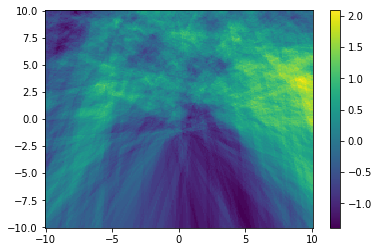

In [27]:
resolution=200
n=1000
taille=10
print_marche_aleatoire(*marche_aleatoire_generalisee(resolution,n,taille))

On obtient une marche aléatoire comparable

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?

In [28]:
import numpy as np
def mouvement_brownien(n):
    X=np.linspace(0,1,n)
    Y=np.linspace(0,1,n)
    Z=np.empty(n,n)
    for i in range(n):
        for j in range(i+1): #
            xi=i/n
            xj=j/n




mouvement_brownien(5,10)

TypeError: mouvement_brownien() takes 1 positional argument but 2 were given